# ML-Driven Insights of Zudio Sales and Store Management for Business Growth

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
# Ignore all warnings
warnings.filterwarnings('ignore')
import os
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv(r'Datasets/Zudio_sales_data.csv')
df.head()

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0


In [3]:
df['Store Manager']

0               Lori Hill
1         Deborah Jackson
2           Adam Anderson
3           Anthony Smith
4          Matthew Romero
              ...        
7894         Stacy Morgan
7895        Gregory Davis
7896           Paul Perez
7897            Eric Kirk
7898    Crystal Maldonado
Name: Store Manager, Length: 7899, dtype: object

In [4]:
df.size

221172

In [5]:
df.shape

(7899, 28)

In [6]:
df.describe()

,Store Number,Postal Code,Selling Area Size (sq ft),Staff Count,Order ID,Customer ID,Product ID,Price,Quantity,Sales Profit
count,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000
mean,50.666034,419982.374984,1112.077478,11.504747,54920.719965,549440.714521,602.069376,1761.113432,4.519433,3170.671376
std,29.095274,11695.237817,193.239371,5.194722,25894.206850,262418.912565,232.066189,716.269447,2.292373,2141.249886
min,1.000000,400006.000000,800.000000,3.000000,10008.000000,100153.000000,204.000000,499.000000,1.000000,200.400000
25%,25.000000,409841.000000,950.000000,7.000000,33192.000000,318516.500000,398.000000,1136.000000,3.000000,1411.200000
50%,51.000000,419988.000000,1100.000000,12.000000,54873.000000,546012.000000,602.000000,1782.000000,5.000000,2681.600000
75%,76.000000,430258.000000,1300.000000,16.000000,77285.000000,780304.000000,803.500000,2373.000000,7.000000,4570.400000
max,100.000000,439985.000000,1400.000000,20.000000,99999.000000,999858.000000,999.000000,2999.000000,8.000000,9596.800000


In [7]:
df.dtypes

Store                         object
Country                       object
State                         object
City                          object
Category                      object
Clothing Type                 object
Store Number                   int64
Postal Code                    int64
Store Type                    object
Store Open Date               object
Selling Area Size (sq ft)      int64
Store Manager                 object
Manager ID                    object
Store Address                 object
Contact Information           object
Operating Hours               object
Staff Count                    int64
Parking Availability          object
Security Features             object
Order ID                       int64
Order Date                    object
Month                         object
Customer ID                    int64
Customer Name                 object
Product ID                     int64
Price                          int64
Quantity                       int64
S

In [8]:
df.columns

Index(['Store', 'Country', 'State', 'City', 'Category', 'Clothing Type',
       'Store Number', 'Postal Code', 'Store Type', 'Store Open Date',
       'Selling Area Size (sq ft)', 'Store Manager', 'Manager ID',
       'Store Address', 'Contact Information', 'Operating Hours',
       'Staff Count', 'Parking Availability', 'Security Features', 'Order ID',
       'Order Date', 'Month', 'Customer ID', 'Customer Name', 'Product ID',
       'Price', 'Quantity', 'Sales Profit'],
      dtype='object')

In [9]:
df['Sales Profit']

0       3916.0
1        831.2
2       1156.0
3       5925.6
4       2652.0
         ...  
7894    1135.2
7895    1451.2
7896     784.4
7897    3254.4
7898    5546.0
Name: Sales Profit, Length: 7899, dtype: float64

In [10]:
df.isnull().sum()

Store                        0
Country                      0
State                        0
City                         0
Category                     0
Clothing Type                0
Store Number                 0
Postal Code                  0
Store Type                   0
Store Open Date              0
Selling Area Size (sq ft)    0
Store Manager                0
Manager ID                   0
Store Address                0
Contact Information          0
Operating Hours              0
Staff Count                  0
Parking Availability         0
Security Features            0
Order ID                     0
Order Date                   0
Month                        0
Customer ID                  0
Customer Name                0
Product ID                   0
Price                        0
Quantity                     0
Sales Profit                 0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()

,Store Number,Postal Code,Selling Area Size (sq ft),Staff Count,Order ID,Customer ID,Product ID,Price,Quantity,Sales Profit
Store Number,1.000000,-0.003311,0.013672,0.014595,-0.006311,0.000440,-0.002716,0.006009,0.003220,0.007288
Postal Code,-0.003311,1.000000,-0.004574,0.004099,0.008418,0.003052,-0.000026,0.007554,-0.007372,-0.002544
Selling Area Size (sq ft),0.013672,-0.004574,1.000000,0.005221,-0.003888,0.018368,-0.008242,-0.012052,-0.012106,-0.016925
Staff Count,0.014595,0.004099,0.005221,1.000000,0.001800,-0.004879,0.013879,-0.009810,0.007177,-0.002982
Order ID,-0.006311,0.008418,-0.003888,0.001800,1.000000,0.005407,0.002313,0.013136,0.007948,0.011312
Customer ID,0.000440,0.003052,0.018368,-0.004879,0.005407,1.000000,-0.001481,-0.004388,-0.016567,-0.019208
Product ID,-0.002716,-0.000026,-0.008242,0.013879,0.002313,-0.001481,1.000000,0.012537,-0.005421,0.011064
Price,0.006009,0.007554,-0.012052,-0.009810,0.013136,-0.004388,0.012537,1.000000,-0.019830,0.584494
Quantity,0.003220,-0.007372,-0.012106,0.007177,0.007948,-0.016567,-0.005421,-0.019830,1.000000,0.739751
Sales Profit,0.007288,-0.002544,-0.016925,-0.002982,0.011312,-0.019208,0.011064,0.584494,0.739751,1.000000


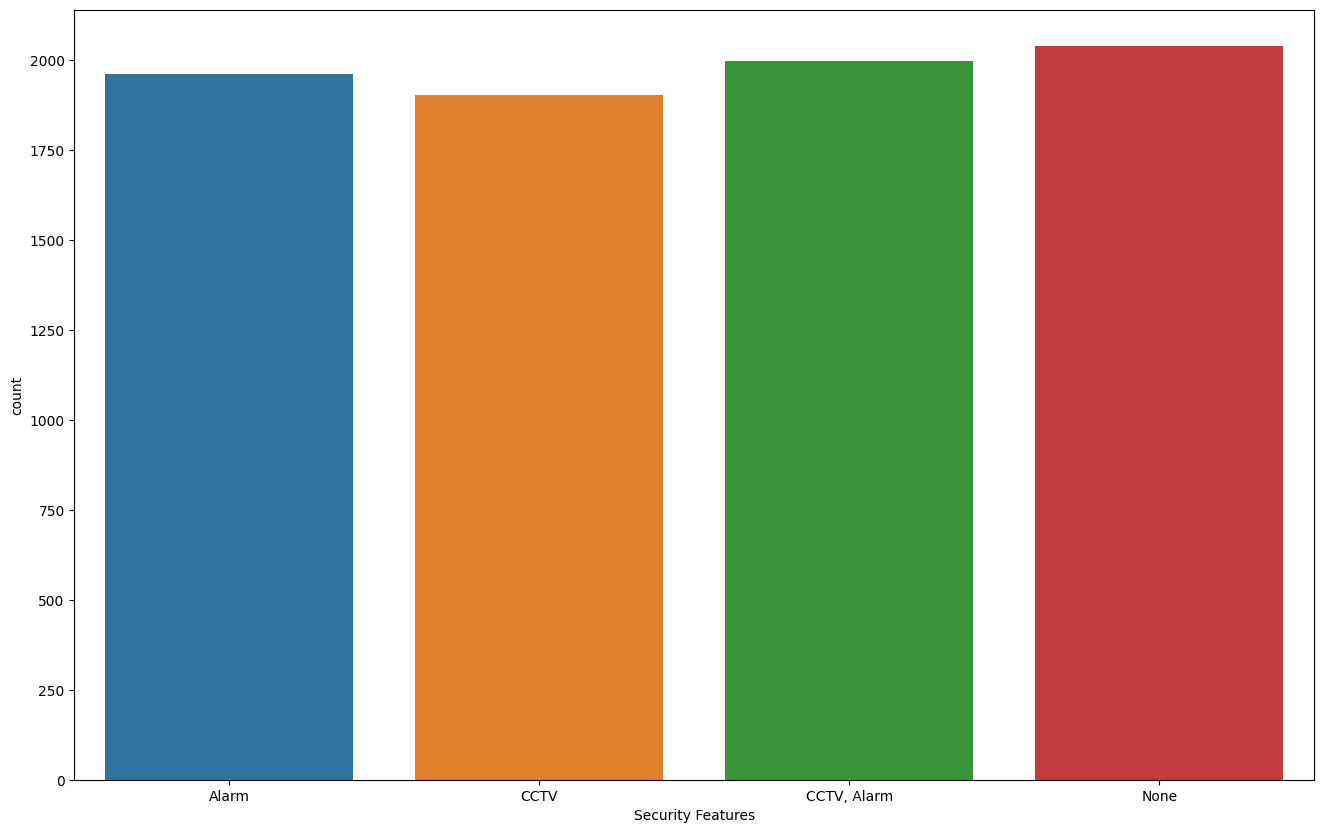

In [13]:
plt.figure(figsize = (16,10))
sns.countplot(x = df['Security Features'])

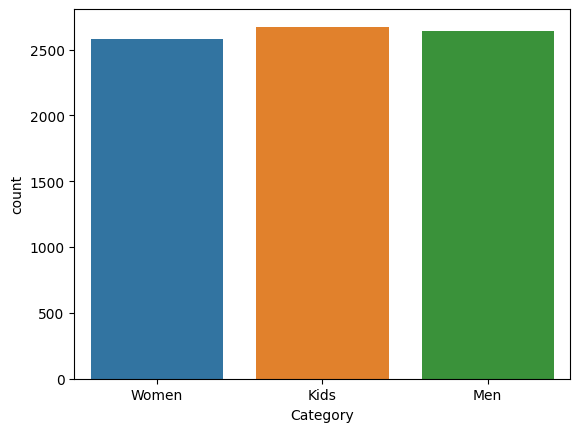

In [14]:
sns.countplot(x = df['Category'])

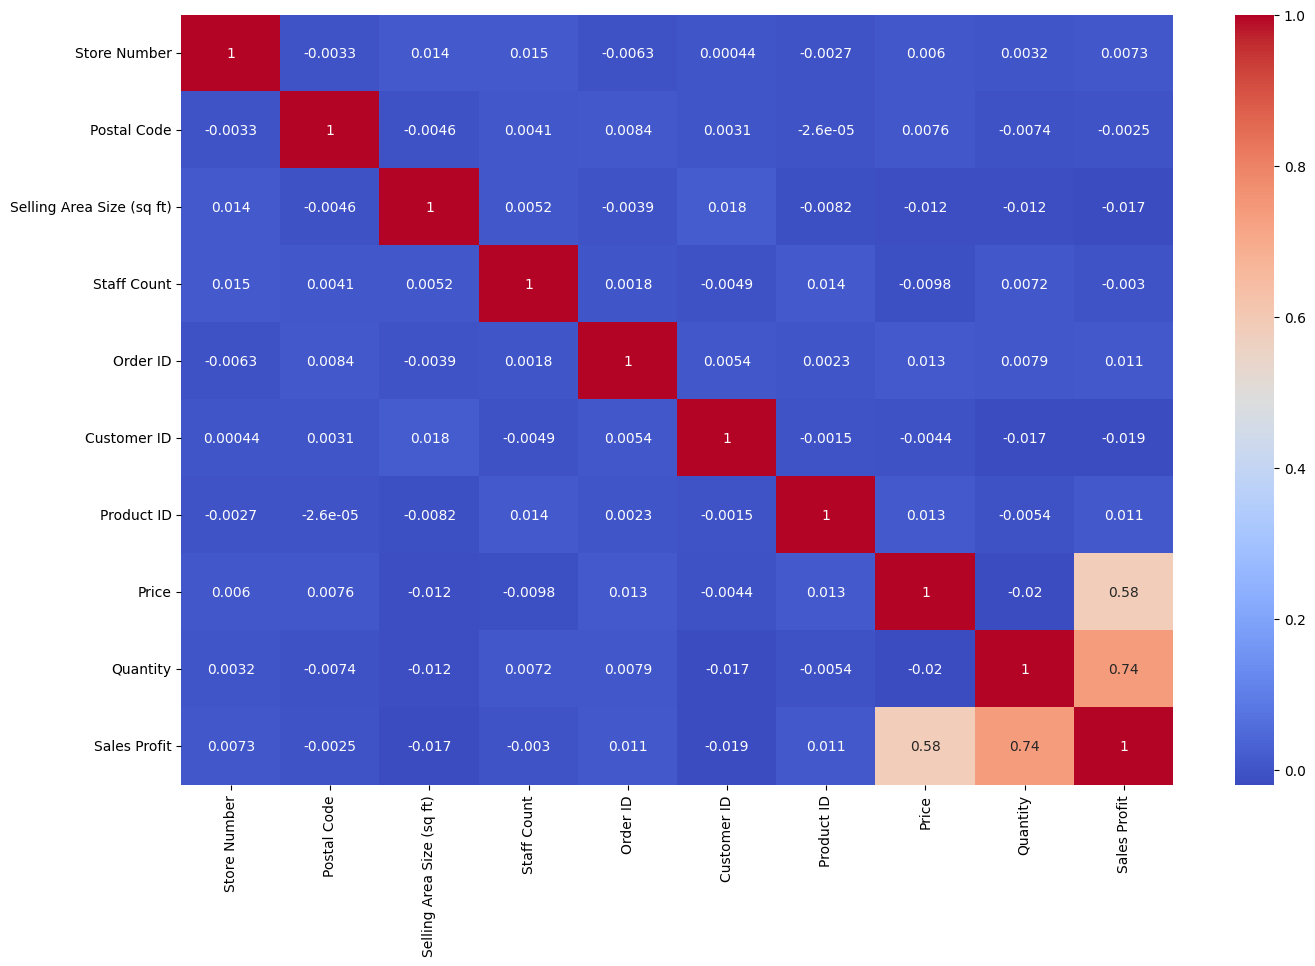

In [15]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')

In [16]:
# Assuming df is your DataFrame
# Identify all columns with object data type
object_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each object type column
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [17]:
X = df.drop(['Sales Profit'],axis = 1)  #independent features
X

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Parking Availability,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity
0,0,0,2,15,2,0,30,411084,0,874,...,1,0,88240,310,9,233084,5190,354,1958,5
1,0,0,1,30,0,7,48,404562,0,349,...,1,0,78145,168,6,926472,1676,741,2078,1
2,0,0,6,20,1,1,97,437773,1,1324,...,1,1,33363,229,1,853255,6762,607,1445,2
3,0,0,7,20,2,0,93,431725,0,1541,...,1,1,46682,86,7,106146,1976,991,2469,6
4,0,0,7,11,1,0,51,415370,0,868,...,1,2,58242,98,0,264070,7283,479,1105,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,0,0,6,5,0,3,32,431437,0,1554,...,1,2,39056,270,11,591993,7171,262,2838,1
7895,0,0,6,2,0,2,52,424643,0,1475,...,1,0,85486,75,7,822244,4451,537,1814,2
7896,0,0,5,32,0,9,81,412057,0,460,...,1,2,78200,336,2,268376,809,457,1961,1
7897,0,0,0,22,1,6,58,405203,1,887,...,1,1,19883,210,5,766283,3426,608,1017,8


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Store                      7899 non-null   int64
 1   Country                    7899 non-null   int64
 2   State                      7899 non-null   int64
 3   City                       7899 non-null   int64
 4   Category                   7899 non-null   int64
 5   Clothing Type              7899 non-null   int64
 6   Store Number               7899 non-null   int64
 7   Postal Code                7899 non-null   int64
 8   Store Type                 7899 non-null   int64
 9   Store Open Date            7899 non-null   int64
 10  Selling Area Size (sq ft)  7899 non-null   int64
 11  Store Manager              7899 non-null   int64
 12  Manager ID                 7899 non-null   int64
 13  Store Address              7899 non-null   int64
 14  Contact Information     

In [19]:
y = df['Sales Profit']
y

0       3916.0
1        831.2
2       1156.0
3       5925.6
4       2652.0
         ...  
7894    1135.2
7895    1451.2
7896     784.4
7897    3254.4
7898    5546.0
Name: Sales Profit, Length: 7899, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6319, 27)
X_test shape: (1580, 27)
y_train shape: (6319,)
y_test shape: (1580,)


In [22]:
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

def calculateMetrics(algorithm,predict, testY):
    
        # Regression metrics
        mae = mean_absolute_error(testY, predict)
        mse = mean_squared_error(testY, predict)
        rmse = np.sqrt(mse)
        r2 = r2_score(testY, predict)
        
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        print(f"{algorithm} Mean Absolute Error (MAE): {mae:.2f}")
        print(f"{algorithm} Mean Squared Error (MSE): {mse:.2f}")
        print(f"{algorithm} Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"{algorithm} R-squared (R²): {r2:.2f}")
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=testY, y=predict, alpha=0.6)
        plt.plot([min(testY), max(testY)], [min(testY), max(testY)], 'r--', lw=2)  # Line of equality
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title(algorithm)
        plt.grid(True)
        plt.show()

Model loaded successfully.
Ridge Mean Absolute Error (MAE): 481.51
Ridge Mean Squared Error (MSE): 406992.44
Ridge Root Mean Squared Error (RMSE): 637.96
Ridge R-squared (R²): 0.91


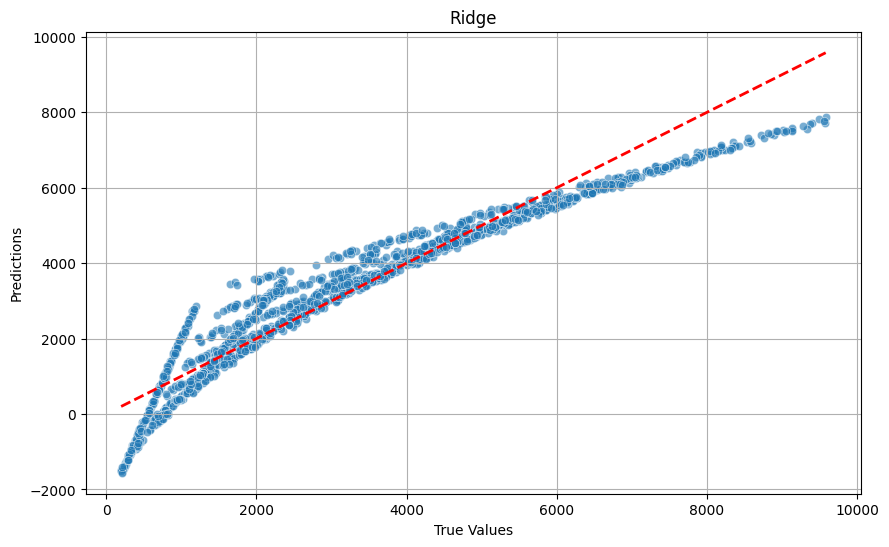

In [23]:
if os.path.exists('model/Ridge.pkl'):
    # Load the trained model from the file
    rge = joblib.load('model/Ridge.pkl')
    print("Model loaded successfully.")
    predict = rge.predict(X_test)
    calculateMetrics("Ridge", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    rge = Ridge(tol=0.01)
    rge.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(rge, 'model/Ridge.pkl')
    print("Model saved successfully.")
    predict = rge.predict(X_test)
    calculateMetrics("Ridge", predict, y_test)

Model loaded successfully.
Linear Regresson Mean Absolute Error (MAE): 481.51
Linear Regresson Mean Squared Error (MSE): 406993.38
Linear Regresson Root Mean Squared Error (RMSE): 637.96
Linear Regresson R-squared (R²): 0.91


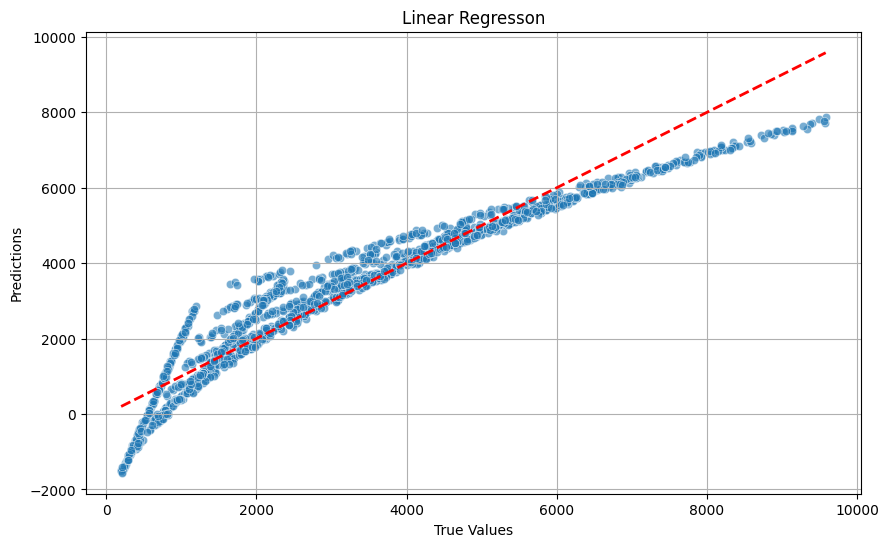

In [24]:
if os.path.exists('model/Linear.pkl'):
    # Load the trained model from the file
    Linear = joblib.load('model/Linear.pkl')
    print("Model loaded successfully.")
    predict = Linear.predict(X_test)
    calculateMetrics("Linear Regresson", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    Linear = LinearRegression()
    Linear.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(Linear, 'model/Linear.pkl')
    print("Model saved successfully.")
    predict = Linear.predict(X_test)
    calculateMetrics("Linear Regresson", predict, y_test)

In [25]:
test = pd.read_csv('Datasets/test.csv')
test

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Parking Availability,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity
0,Zudio,India,Delhi,Kolhapur,Kids,Sweaters,97,403504,Rented,2022-07-20,...,Not Available,"CCTV, Alarm",16263,2024-07-09,July,709054,Michael Mcdonald,272,2639,4
1,Zudio,India,Delhi,Mumbai,Kids,Hoodies,89,428768,Owned,2023-02-28,...,Available,None,18747,2024-02-12,February,579530,Joe Conley,481,2300,4
2,Zudio,India,Maharashtra,Mumbai,Kids,Pants,90,427842,Owned,2023-01-21,...,Not Available,CCTV,92319,2024-04-26,April,157127,Philip Garcia,793,2845,5
3,Zudio,India,Tamil Nadu,Surat,Women,Shoes,65,438906,Owned,2023-10-03,...,Not Available,None,51428,2024-08-08,August,114282,William Willis,376,1036,6
4,Zudio,India,Maharashtra,Goa,Kids,Shoes,66,414429,Owned,2021-12-29,...,Available,Alarm,43747,2024-11-04,November,116311,Sean Taylor,568,1595,4
5,Zudio,India,Maharashtra,Nagpur,Kids,Skirts,18,424876,Owned,2022-11-25,...,Available,None,51919,2024-10-26,October,751776,Willie Bullock,340,1436,4
6,Zudio,India,West Bengal,Ranchi,Kids,Jackets,27,405170,Rented,2022-06-29,...,Not Available,"CCTV, Alarm",99018,2024-02-13,February,452019,Dr. Jordan Ward,341,1667,8
7,Zudio,India,Delhi,Faridabad,Women,Pants,49,426427,Rented,2021-11-02,...,Not Available,None,29865,2024-04-05,April,503280,Robert Sparks,759,1374,2
8,Zudio,India,West Bengal,Vadodara,Women,Shirts,39,416863,Owned,2024-10-05,...,Not Available,"CCTV, Alarm",65687,2024-08-15,August,706474,Perry Meyer,773,1466,6
9,Zudio,India,Uttar Pradesh,Aurangabad,Kids,Tops,70,425843,Owned,2021-04-10,...,Not Available,"CCTV, Alarm",78376,2024-05-31,May,115280,Robert Williams,269,2430,8


In [26]:
object_cols = test.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each object type column
for col in object_cols:
    test[col] = label_encoder.fit_transform(test[col].astype(str))


In [27]:
predict = Linear.predict(test)
predict

array([ 4354.60958235,  3806.00950201,  5480.27861823,  2918.61544906,
        2549.1432347 ,  2234.41592608,  5452.69501596,   716.98552046,
        3729.37430114,  6776.29110671,  2227.87056741, -1488.05470677])

In [28]:
test['Predict'] = predict
test

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Predict
0,0,0,0,4,0,6,97,403504,1,6,...,2,16263,6,3,709054,4,272,2639,4,4354.609582
1,0,0,0,5,0,0,89,428768,0,9,...,3,18747,0,2,579530,3,481,2300,4,3806.009502
2,0,0,1,5,0,2,90,427842,0,8,...,1,92319,3,0,157127,6,793,2845,5,5480.278618
3,0,0,3,9,2,4,65,438906,0,10,...,3,51428,7,1,114282,10,376,1036,6,2918.615449
4,0,0,1,2,0,4,66,414429,0,2,...,0,43747,11,5,116311,9,568,1595,4,2549.143235
5,0,0,1,6,0,5,18,424876,0,7,...,3,51919,10,6,751776,11,340,1436,4,2234.415926
6,0,0,5,8,0,1,27,405170,1,5,...,2,99018,1,2,452019,1,341,1667,8,5452.695016
7,0,0,0,1,2,2,49,426427,1,1,...,3,29865,2,0,503280,7,759,1374,2,716.985520
8,0,0,5,10,2,3,39,416863,0,11,...,2,65687,8,1,706474,5,773,1466,6,3729.374301
9,0,0,4,0,0,7,70,425843,0,0,...,2,78376,4,4,115280,8,269,2430,8,6776.291107
